<a href="https://colab.research.google.com/github/HargunG/Fashion_MNIST/blob/main/CNN_Model_for_Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team Project: Building a CNN model for Fashion MNIST Dataset

Team Members: Apy Sen, Ernest Romero, Hargun Kaur Gill, Nathan Gia Do, Nolan Phong Do

# Installing Visual Keras

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 8.8 MB/s eta 0:00:00


#Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout # Import Dropout for regularization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import visualkeras
from keras.utils import plot_model
from PIL import Image
import warnings
warnings.filterwarnings("ignore") # To ignore all warnings

#Loading Data

In [ ]:
# Load Fashion MNIST
#The train_images and train_labels arrays are the training set—the data the model uses to learn.
#The model is tested against the test set, the test_images, and test_labels arrays.

(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The data exploration and fashion class names code has been picked up from the notebook referenced below.
Reference: https://www.tensorflow.org/tutorials/keras/classification


In [ ]:
# Define the class names for the Fashion MNIST dataset
# Each image is mapped to a single label. Since the class names are not included with the dataset,
# we store them here to use later when plotting the images:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [ ]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [ ]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [ ]:
len(test_labels)

10000

#Preprocess the data
The data must be preprocessed before training the network. When we inspect the first image in the training set, we see that the pixel values fall in the range of 0 to 255:

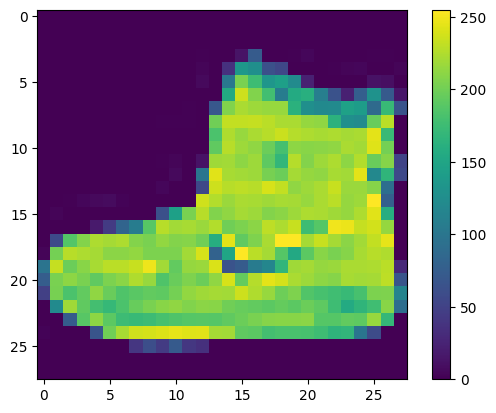

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Hence, we scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [ ]:
# Normalize data
train_images, test_images = train_images / 255.0, test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

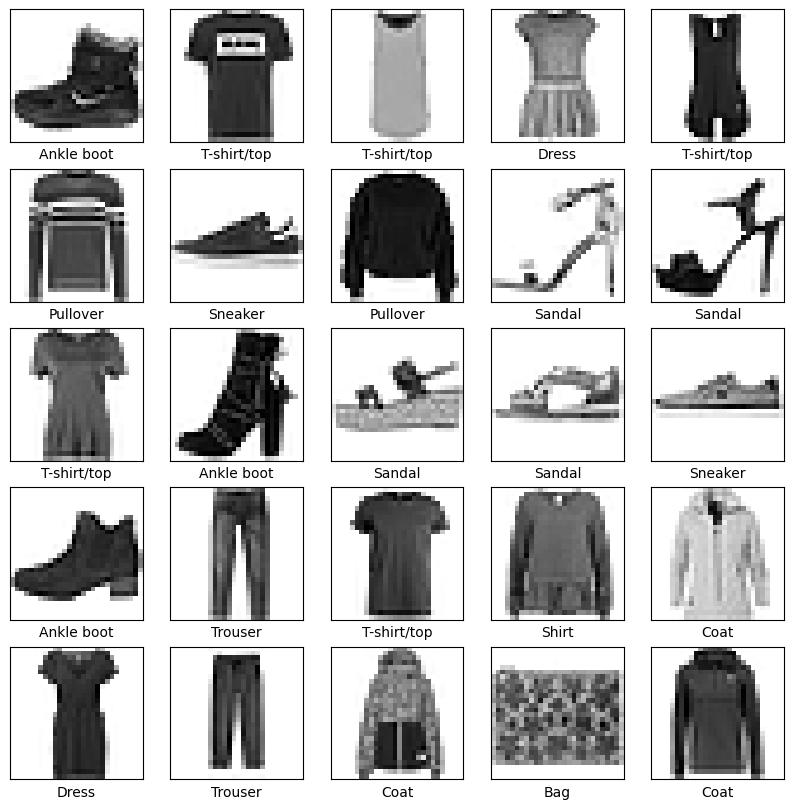

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Building the model
Here we will start building the neural network which requires configuring the layers of the model, then compiling the model.

##Layer-by-Layer Explanation

###Convolutional Layer 1
- **Type**: Conv2D  
- **Parameters**:  
  - 32 filters  
  - Kernel size: (3, 3)  
  - Activation: ReLU  
  - Input shape: (28, 28, 1) (grayscale images of size 28x28)  
- **Function**:  
  Extracts low-level features such as edges and textures from the input image. Each filter slides over the input to apply a convolution operation, learning distinct spatial patterns.

### Max Pooling Layer 1
- **Type**: MaxPooling2D  
- **Parameters**:  
  - Pool size: (2, 2)  
- **Function**:  
  Reduces the spatial dimensions of the feature maps by half, retaining the most important features. This downsizing reduces computational complexity and helps prevent overfitting.

### Dropout Layer 1
- **Type**: Dropout  
- **Parameters**:  
  - Dropout rate: 30% (randomly drops 30% of neurons)  
- **Function**:  
  Helps prevent overfitting by deactivating random neurons during training, ensuring the model does not rely too heavily on specific features.

### Convolutional Layer 2
- **Type**: Conv2D  
- **Parameters**:  
  - 64 filters  
  - Kernel size: (3, 3)  
  - Activation: ReLU  
- **Function**:  
  Learns more complex patterns, such as shapes and textures, from the output of the first convolutional block.

### Max Pooling Layer 2
- **Type**: MaxPooling2D  
- **Parameters**:  
  - Pool size: (2, 2)  
- **Function**:  
  Further reduces the spatial dimensions of the feature maps and consolidates learned features, aiding in reducing overfitting and computational demands.

### Dropout Layer 2
- **Type**: Dropout  
- **Parameters**:  
  - Dropout rate: 30%  
- **Function**:  
  Similar to Dropout Layer 1, this layer reduces overfitting, particularly as the network progresses to deeper layers.

### Flatten Layer
- **Type**: Flatten  
- **Function**:  
  Converts the 2D feature maps from the convolutional and pooling layers into a 1D vector. This transformation prepares the data for the fully connected layers.

### Fully Connected Layer 1
- **Type**: Dense  
- **Parameters**:  
  - 128 neurons  
  - Activation: ReLU  
- **Function**:  
  Acts as a classifier by learning complex interactions between features in the flattened data. The ReLU activation introduces non-linearity, allowing the model to learn more sophisticated patterns.

### Dropout Layer 3
- **Type**: Dropout  
- **Parameters**:  
  - Dropout rate: 50%  
- **Function**:  
  A higher dropout rate at this stage helps significantly reduce overfitting in the dense layers, where parameters are most abundant.

### Output Layer
- **Type**: Dense  
- **Parameters**:  
  - 10 neurons  
  - Activation: Softmax  
- **Function**:  
  Produces probabilities for each of the 10 classes. The softmax activation ensures that the output forms a valid probability distribution, summing to 1.


**Code Modification Explanation:**

This code has been adapted from the reference implementation found at [this GitHub repository](https://github.com/guilhermedom/cnn-fashion-mnist/blob/main/notebooks/1.0-gdfs-cnn-fashion-mnist.ipynb). Modifications were made to incorporate **Dropout layers** and simplify the architecture for better generalization and efficiency. The key changes are as follows:

1. **Added Dropout Layers:**  
   - Dropout layers were introduced after each **MaxPool2D** layer to reduce overfitting by randomly deactivating a fraction of neurons during training.
   - An additional Dropout layer was added after the dense layer (following the Flatten layer) to further ensure generalization, especially in the fully connected layers, which are prone to overfitting.

2. **Removed the Third Conv2D Layer:**  
   - The third convolutional layer from the original code was removed to simplify the architecture. The first two convolutional layers were deemed sufficient for feature extraction given the relatively low complexity of the Fashion MNIST dataset.

3. **Reorganized Fully Connected Layers:**
   - After the Flatten layer, a single **ReLU-activated dense layer** was retained for learning high-level feature representations. This was followed by:
     - A Dropout layer to reduce overfitting.
     - A final dense layer with **softmax activation** to output class probabilities for the \(10\) categories in the Fashion MNIST dataset.

---

**Reasoning for Using Dropout Layers:**

Dropout layers are an effective regularization technique that prevent overfitting, especially in smaller datasets like Fashion MNIST. By randomly "dropping" a fraction of neurons during training:
- The model becomes less reliant on specific neurons and generalizes better to unseen data.
- It helps avoid overfitting in both convolutional layers (where local patterns are extracted) and fully connected layers (which have a higher parameter count).

This architecture balances model complexity and performance, making it more robust to variations in the dataset while maintaining computational efficiency.

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # Convolutional layer 1
    layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer 1
    Dropout(0.3),  # Dropout layer with a rate of 30%
    layers.Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer 2
    layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer 2
    Dropout(0.3),  # Dropout layer with a rate of 30%
    layers.Flatten(),  # Flatten layer to convert 3D feature maps to 1D
    layers.Dense(128, activation='relu'),  # Fully connected layer 1
    Dropout(0.5),  # Dropout layer with a rate of 50%
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes (softmax for probabilities)
])

**Note**: We had to add Dropout layers into our CNN model, the earlier model with no Dropout layers was overfitting on the training data.
We had observed the following for the Model with no dropout layers:
1. **Training accuracy** was at 0.9662 indicating that the model correctly classified 96.62% of the training samples.
2. **Training loss** was at 0.0915 as loss is a measure of error, it means that the smaller the value, the better the model fits the training data. Hence, the training loss for the model without droput layers was less than 10%
3. **Validation accuracy** was at 0.9022 which shows that the model correctly classified 90.22% of the validation samples. Validation accuracy should usually be lower than training accuracy as it evaluates the model on unseen data.
4. **Validation loss** was at 0.3224 and we know that Validation loss is often higher than training loss because the model may not generalize perfectly to unseen data.

### Key Takeaways for the Model with no dropout layers:
**High Training Accuracy vs. Lower Validation Accuracy:**
Indicated possible overfitting as the gap is significant, the training accuracy was 96.62% while the Validation accuracy was at 90.22%. This meant that the model might be memorizing the training data instead of generalizing to new data.

**Loss Comparison:**
A higher Validation loss (32.24%) compared to Training loss (9.15%) suggests that the model is not generalizing well. As the gap grew larger with more epochs, we decided on using regularization techniques like dropout in the newer model.

##Model's Summary

In [ ]:
# Display the model summary - Shows the architecture and parameters of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 3D visualization of our model architecture

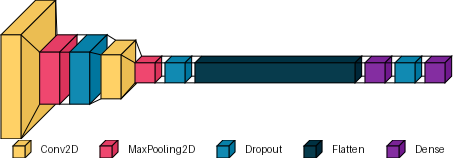

In [ ]:
# Visualize the model architecture
visualkeras.layered_view(
    model,
    legend=True,  # Add a legend for layer types
    padding = True# Padding between layers
)

## Detailed CNN Model Visualization

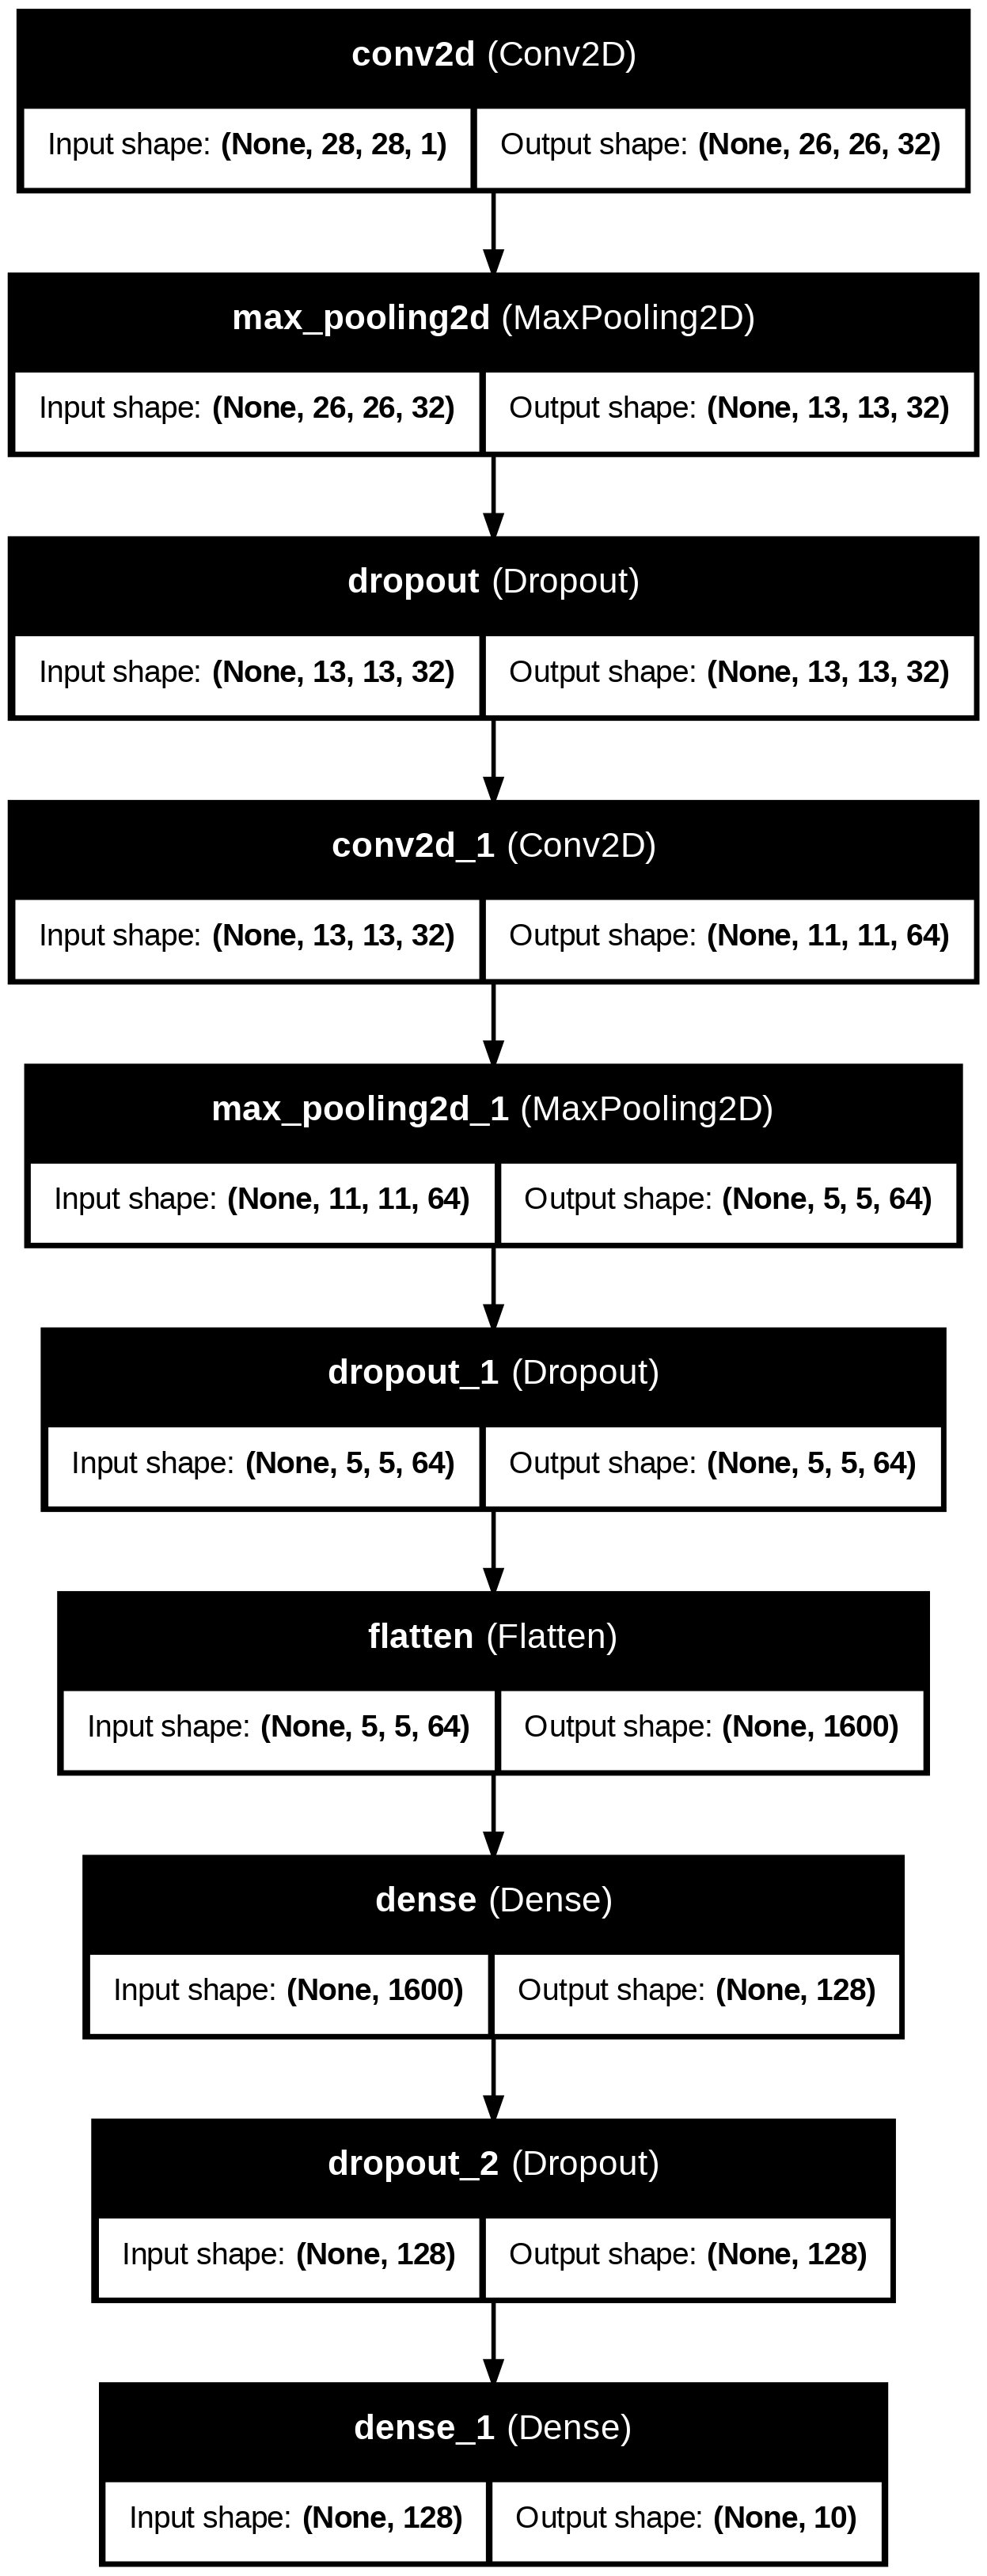

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

#Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:



*   **Optimizer** —This is how the model is updated based on the data it sees and its loss function.
*   **Loss function** —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
*   **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [ ]:
# Compile the model - Configure the optimizer, loss function, and metrics
model.compile(optimizer='adam',  # Adam optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])  # Evaluation metric

# Train the model
Training the neural network model requires the following steps:

1.   Feed the training data to the model. In this model, the training data is in the train_images and train_labels arrays.
2.   The model learns to associate images and labels.
3.   Asking the model to make predictions about a test set—in this model, the test_images array.
4.   Verify that the predictions match the labels from the test_labels array.

## Feed the model
To start training, we call the model.fit method—so called because it "fits" the model to the training data:

In [ ]:
# Train the model - Fit the model to the training data
history = model.fit(train_images, train_labels,
                    epochs=20,  # Number of training epochs
                    validation_data=(test_images, test_labels),  # Validation data for monitoring performance
                    batch_size=64)  # Batch size for training

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 71ms/step - accuracy: 0.6725 - loss: 0.9078 - val_accuracy: 0.8425 - val_loss: 0.4304
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 66ms/step - accuracy: 0.8350 - loss: 0.4602 - val_accuracy: 0.8675 - val_loss: 0.3664
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8576 - loss: 0.3960 - val_accuracy: 0.8833 - val_loss: 0.3252
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.8648 - loss: 0.3711 - val_accuracy: 0.8892 - val_loss: 0.3095
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 68ms/step - accuracy: 0.8761 - loss: 0.3433 - val_accuracy: 0.8948 - val_loss: 0.2883
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.8804 - loss: 0.3296 - val_accuracy: 0.8947 - val_loss: 0.2849
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.8823 - loss: 0.3186 - val_accuracy: 0.8995 - val_loss: 0.2746
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.8864 - loss: 0.3109 - 

## Analysis of the Results


1.   **Training Accuracy (accuracy: ~0.9036):**
The model achieves ~90.36% accuracy on the training data. This is slightly lower than before when the model did not have dropout layers, which is expected because Dropout deliberately "disables" some neurons during training. This regularization prevents the model from overfitting to the training data.

2.   **Training Loss (loss: ~0.2545):**
The training loss has increased compared to the previous run without Dropout. Again, this is expected because Dropout adds randomness, making it harder for the model to memorize specific patterns in the training data.
3. **Validation Accuracy (val_accuracy: ~0.9100):**
The validation accuracy (90.99%) is now very close to the training accuracy (90.67%), showing better generalization and less overfitting. The model is performing well on unseen data.
4. **Validation Loss (val_loss: ~0.2414):**
The validation loss has decreased significantly, indicating the model is fitting the validation data more effectively without overfitting.

## Key Takeaways
**Better Generalization:** The validation metrics are now closer to the training metrics, a sign that the model is learning features that generalize well to unseen data.

**Controlled Overfitting:** Dropout is doing its job by preventing overfitting, as seen by the reduced gap between training and validation accuracy/loss.


# Progress of the model
Let's see how the model progressed during training:

The code for creating the plots was picked up from the utils library created on the github profile referenced below:

Reference: https://github.com/liady/ssp19ai_utils/blob/master/utils.py

In [ ]:
# Create a function to plot the accuracy and loss of the model
def plot_accuracy_and_loss(history):
  accuracy_label = 'accuracy' if 'accuracy' in history.history else 'acc'
  # Plot training & validation accuracy values
  plt.plot(history.history[accuracy_label])
  plt.plot(history.history['val_'+accuracy_label])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


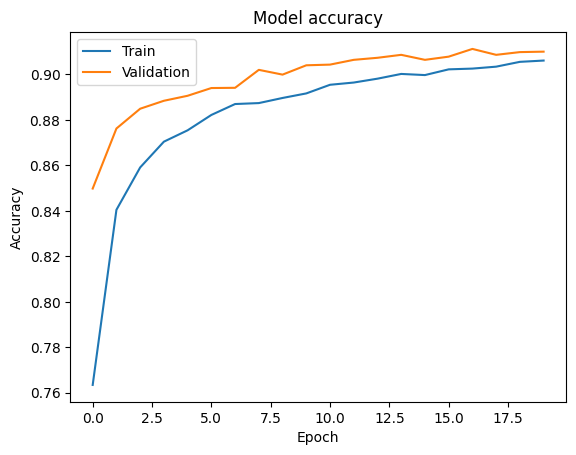

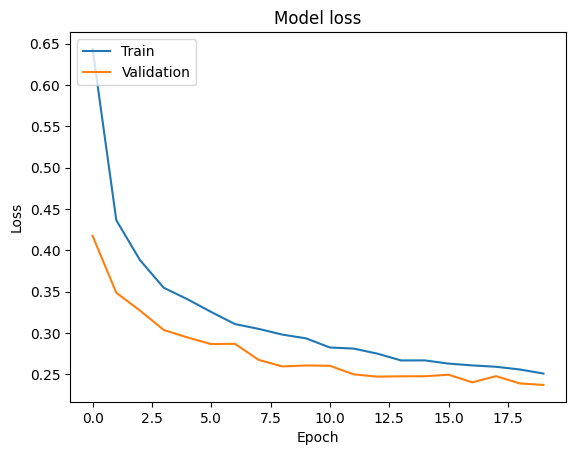

In [ ]:
plot_accuracy_and_loss(history)

## Model Evaluation
Using TensorFlow's evaluate function we get an accuracy of nearly 91% for our model. This is a neat performance, considering that our model is rather simple, being shallow and ignoring a bit of overfitting.

Reference: https://github.com/guilhermedom/cnn-fashion-mnist/blob/main/notebooks/1.0-gdfs-cnn-fashion-mnist.ipynb

In [ ]:
# Evaluate the model - Assess performance on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 7ms/step - accuracy: 0.9100 - loss: 0.2373

Test accuracy: 0.9100000262260437


## Plotting Training and Validation Accuracy

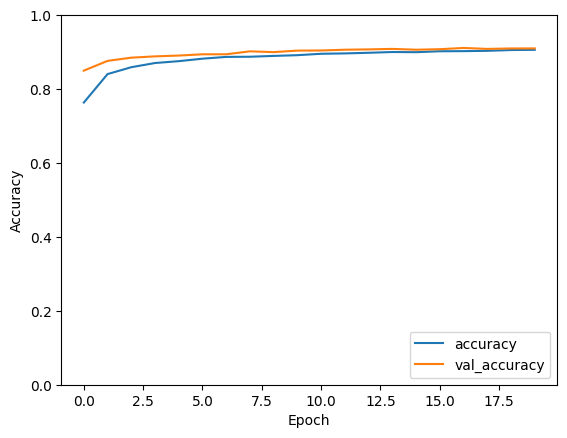

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Make predictions
With the model trained, we can use it to make predictions about some images. The last layer of our model was a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [ ]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([1.7970708e-11, 1.4679997e-11, 2.5291160e-13, 5.9062729e-12,
       4.7412611e-13, 2.1384540e-06, 9.8901215e-13, 6.9321963e-05,
       8.0547374e-12, 9.9992853e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

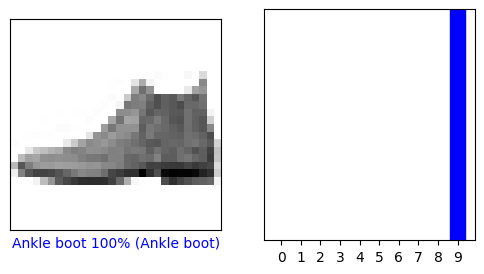

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

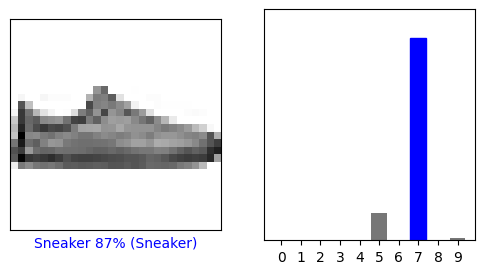

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions.

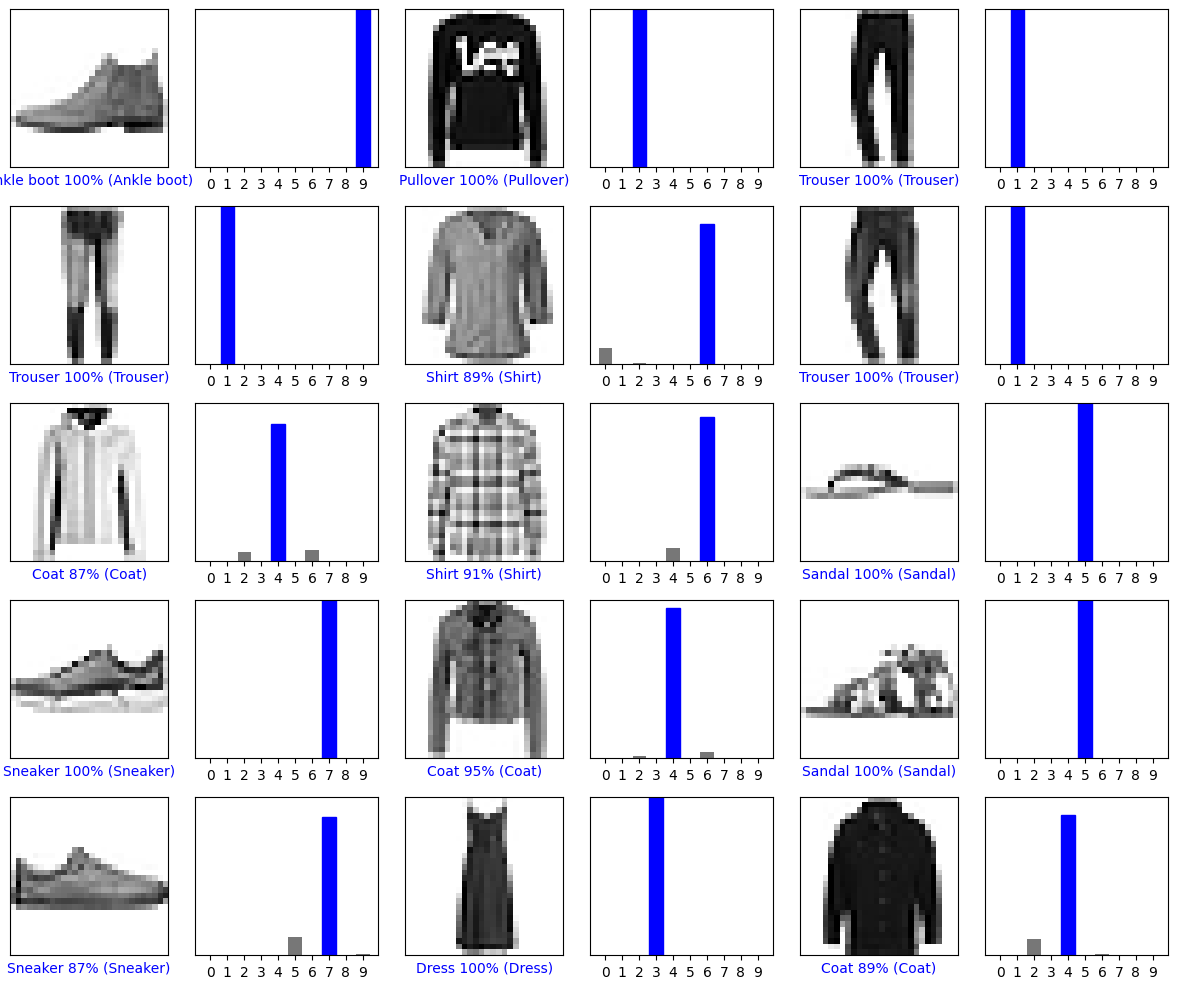

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# Accordingly, even though you're using a single image, you need to add it to a list
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[1.0128978e-06 1.7970310e-15 9.9999237e-01 1.7156397e-10 4.8281145e-06
  1.6781651e-21 1.7943061e-06 2.6137752e-24 2.3835671e-09 1.7704066e-22]]


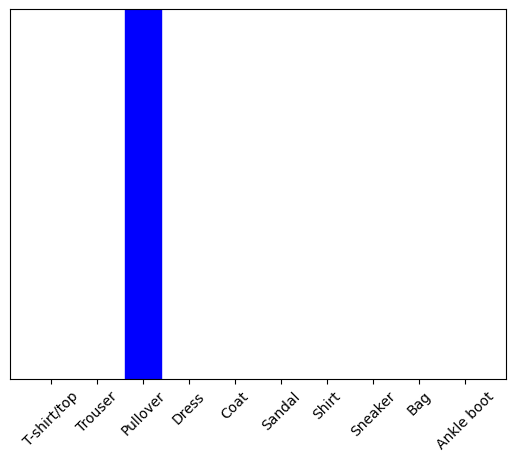

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2

# Confusion Matrix Heatmap

The confusion matrix for our model's predictions also has the majority of values in the main diagonal, indicating a good performance. Note that the mistakes are concentrated in some specific classes, like class 0 (t-shirt) that gets misclassified as class 6 (shirt) a lot of times. This is understandable, since both objects are quite similar and the images do not have much details to help differentiate them.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


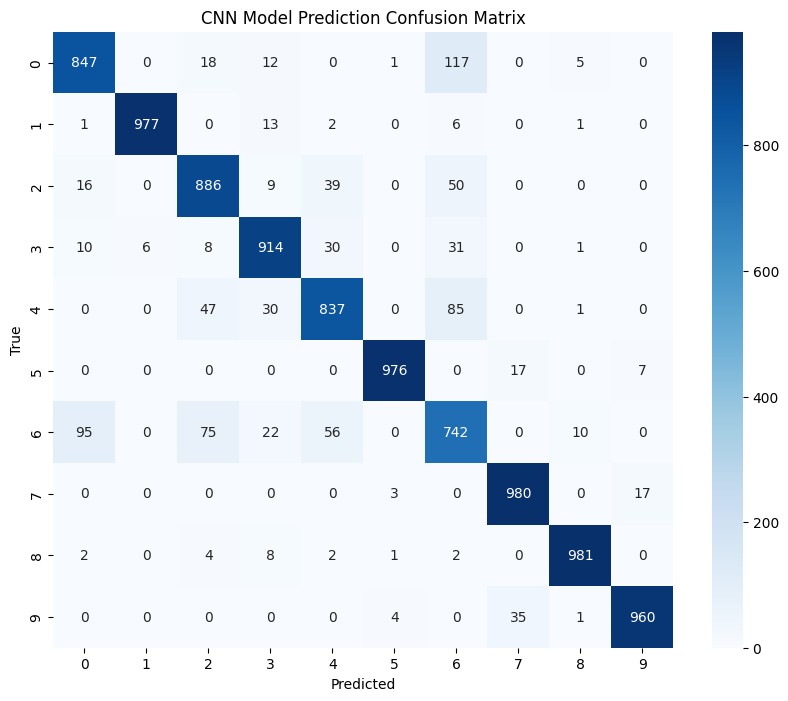

In [ ]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("CNN Model Prediction Confusion Matrix")
plt.show()

# Classification Report
Sklearn's classification_report reassures our previous conclusions. Overall accuracy is at 91%. Class 6 has a low F1-score, for being a false positive for class 0 too much.

We can also see how much class 0 (t-shirt) and class 6 (shirt) look alike. Another class with low recall is class 2 (pullover) and it is also very similar to classes 0 and 6. Low recall means many false negatives, i.e., class 2 is commonly said to be class 0 or 6.


In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(test_labels, predicted_labels, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.85      0.86      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.85      0.89      0.87      1000
     Class 3       0.91      0.91      0.91      1000
     Class 4       0.87      0.84      0.85      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.72      0.74      0.73      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

